In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


# read each of the csv files as a *pandas data frame*
dataset = pd.read_csv("/content/drive/My Drive/CSC311: Group Project/Dataset/cleaned_data_combined_TRIMMED.csv",
                      keep_default_na=False         # Prevent pandas from auto-converting "None"-like strings
                      )

# display one the dataframes in the notebook
dataset

,id,"Q1: From a scale 1 to 5, how complex is it to make this food? (Where 1 is the most simple, and 5 is the most complex)",Q2: How many ingredients would you expect this food item to contain?,Q3: In what setting would you expect this food to be served? Please check all that apply,Q4: How much would you expect to pay for one serving of this food item?,Q5: What movie do you think of when thinking of this food item?,Q6: What drink would you pair with this food item?,"Q7: When you think about this food item, who does it remind you of?",Q8: How much hot sauce would you add to this food item?,Label
0,716549,3,6.0,"Week day lunch,At a party,Late night snack",5.00,Cloudy with a Chance of Meatballs,Coke,Friends,A little (mild),Pizza
1,715742,4,2.0,"Week day lunch,At a party,Late night snack",5.00,All sort of american young boy movies,Coke,"Friends,Teachers,Strangers",None,Pizza
2,727333,3,5.0,"Week day lunch,Week day dinner,Weekend lunch,W...",10.00,action movie,cola,Friends,A moderate amount (medium),Pizza
3,606874,4,7.0,"Week day lunch,Week day dinner,Weekend lunch,W...",3.00,Mamma Mia,Soda,"Siblings,Friends,Teachers",I will have some of this food item with my hot...,Pizza
4,505318,2,3.0,"Week day lunch,Week day dinner,Weekend lunch,W...",5.00,Cloudy with a chance of meatballs,Soda,"Siblings,Friends",A little (mild),Pizza
...,...,...,...,...,...,...,...,...,...,...
1534,630209,4,4.0,"Week day lunch,Week day dinner,Weekend lunch,W...",11.00,Kiki’s Delivery Service,Ginger tea,"Parents,Siblings,Friends",None,Sushi
1535,386750,3,4.5,"Week day lunch,Weekend lunch",13.50,One Piece Film Gold,Water,Friends,A little (mild),Sushi
1536,617178,2,5.0,"Week day lunch,Weekend lunch,At a party",10.00,I think of the anime Food Wars,Nothing in particular– probably just water,Parents,None,Sushi
1537,630128,1,3.0,"Week day lunch,Weekend lunch,Late night snack",1.00,John Wick 3,Any tea,"Siblings,Friends,Strangers",A little (mild),Sushi


## Data Exploration
Below, visual analysis was performed for each of the 8 features in relation to the 3 ground-truth labels.

The main objective of this data exploration phase was to get an intuitive sense of how significantly each feature is correlated to the ground truth for each data point.

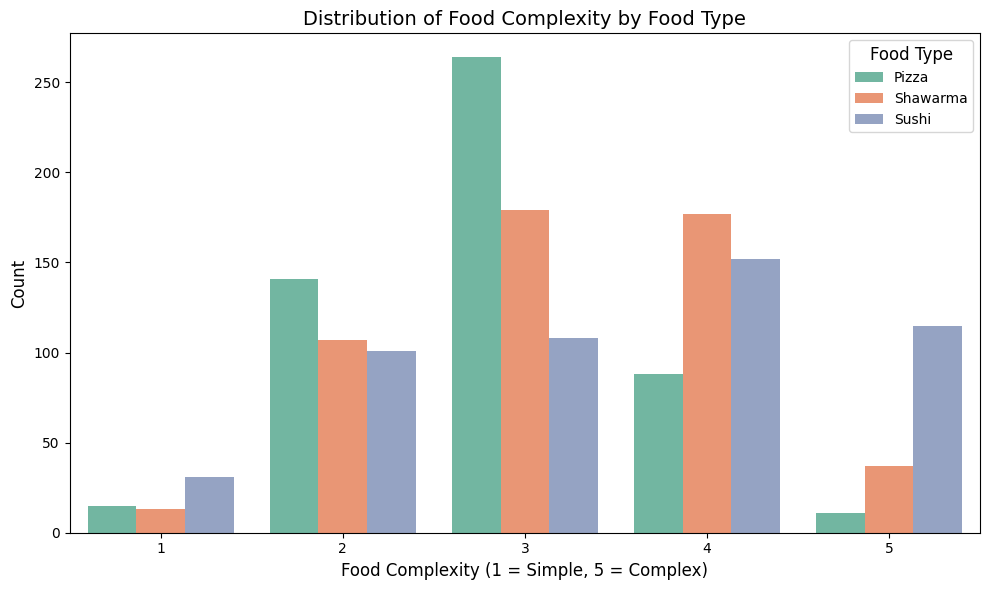

In [3]:
# Set up the plot
plt.figure(figsize=(10, 6))  # Adjust size for readability
sns.countplot(
    x="Q1: From a scale 1 to 5, how complex is it to make this food? (Where 1 is the most simple, and 5 is the most complex)",
    hue="Label",
    data=dataset,
    palette="Set2",  # Color scheme for clarity
    order=[1, 2, 3, 4, 5]  # Ensure ordinal order is respected
)

# Customize the plot
plt.title("Distribution of Food Complexity by Food Type", fontsize=14)
plt.xlabel("Food Complexity (1 = Simple, 5 = Complex)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Food Type", fontsize=10, title_fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()

<ipython-input-4-8b1caf38af82>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


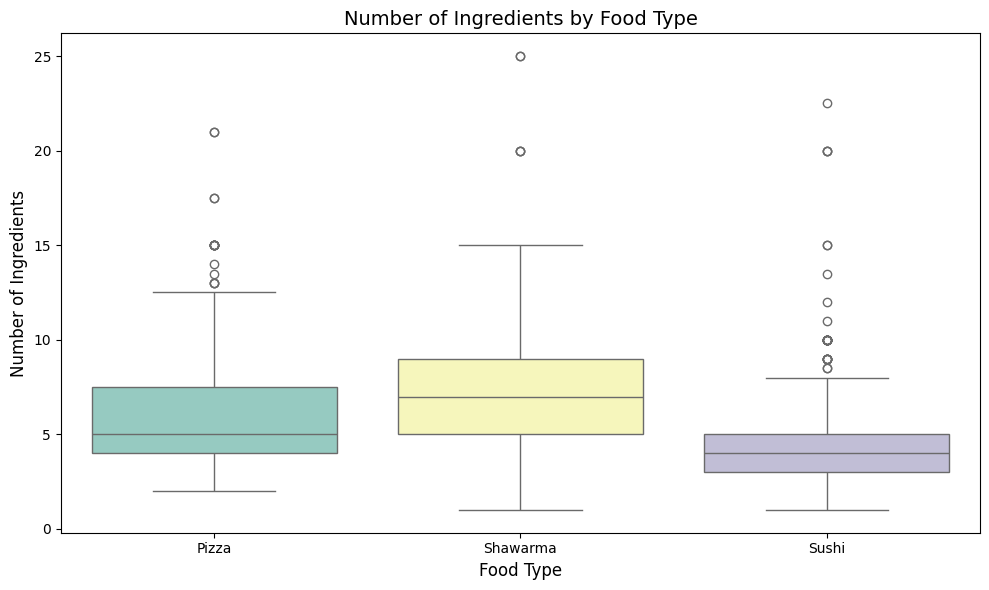

In [4]:
# Set up the plot
plt.figure(figsize=(10, 6))  # Adjust size for readability
sns.boxplot(
    x="Label",
    y="Q2: How many ingredients would you expect this food item to contain?",
    data=dataset,
    palette="Set3"  # Distinct colors for each food type
)

# Customize the plot
plt.title("Number of Ingredients by Food Type", fontsize=14)
plt.xlabel("Food Type", fontsize=12)
plt.ylabel("Number of Ingredients", fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()

<Figure size 1400x600 with 0 Axes>

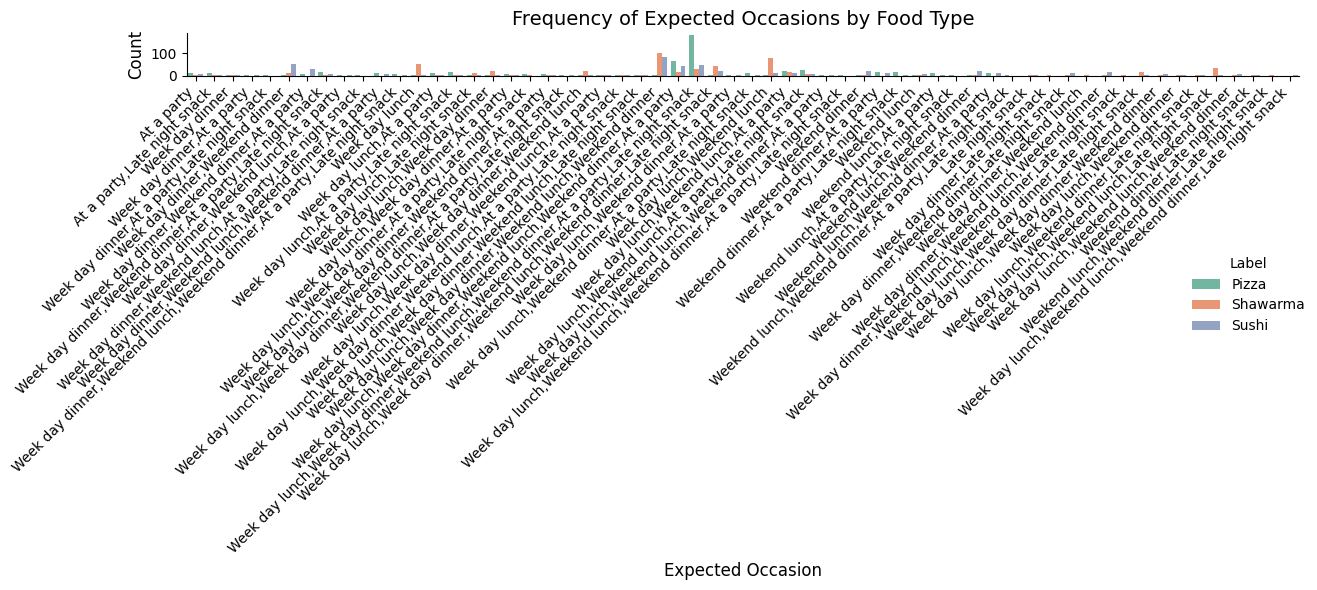

In [5]:
# Explode the multi-label sets into individual rows
exploded_data = dataset.explode("Q3: In what setting would you expect this food to be served? Please check all that apply")

# Aggregate counts by Label and Occasion
count_data = exploded_data.groupby(["Label", "Q3: In what setting would you expect this food to be served? Please check all that apply"]).size().reset_index(name="Count")

# Set up the plot
#occasions = ["Weekday Lunch", "Weekday Dinner", "Weekend Lunch", "Weekend Dinner", "Party", "Latenight Snack"]
plt.figure(figsize=(14, 6))  # Wider to fit all bars
sns.catplot(
    x="Q3: In what setting would you expect this food to be served? Please check all that apply",
    y="Count",
    hue="Label",
    kind="bar",
    data=count_data,
    height=6,
    aspect=2,
    palette="Set2",
    #order=occasions  # Preserve the original category order
)

# Customize the plot
plt.title("Frequency of Expected Occasions by Food Type", fontsize=14)
plt.xlabel("Expected Occasion", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha="right")  # Rotate for readability
plt.tight_layout()

# Display the plot
plt.show()

<ipython-input-6-4f72d8ebdbc8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


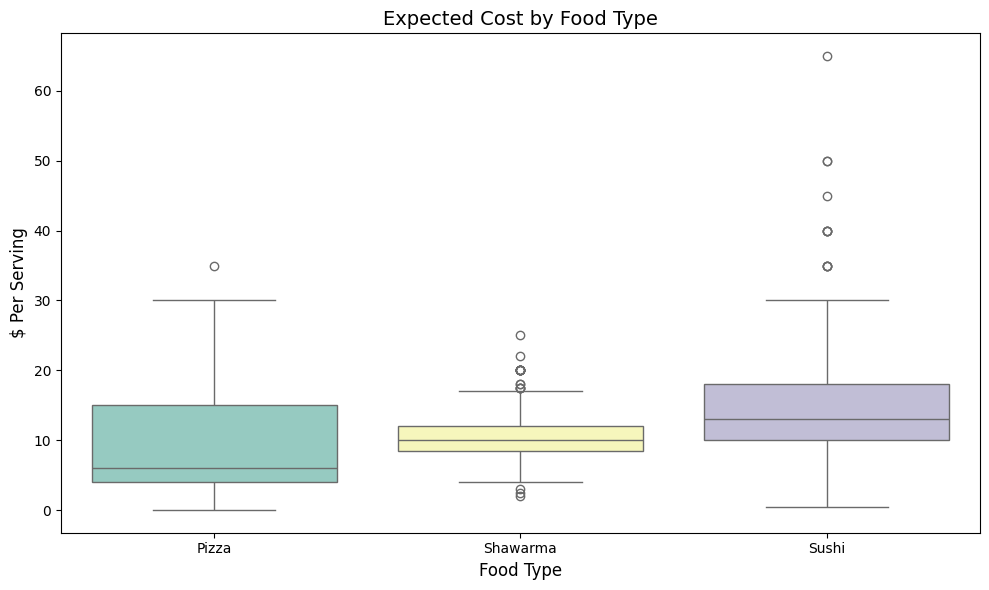

In [6]:
# Set up the plot
plt.figure(figsize=(10, 6))  # Adjust size for readability
sns.boxplot(
    x="Label",
    y="Q4: How much would you expect to pay for one serving of this food item?",
    data=dataset,
    palette="Set3"  # Distinct colors for each food type
)

# Customize the plot
plt.title("Expected Cost by Food Type", fontsize=14)
plt.xlabel("Food Type", fontsize=12)
plt.ylabel("$ Per Serving", fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()

<Figure size 1200x600 with 0 Axes>

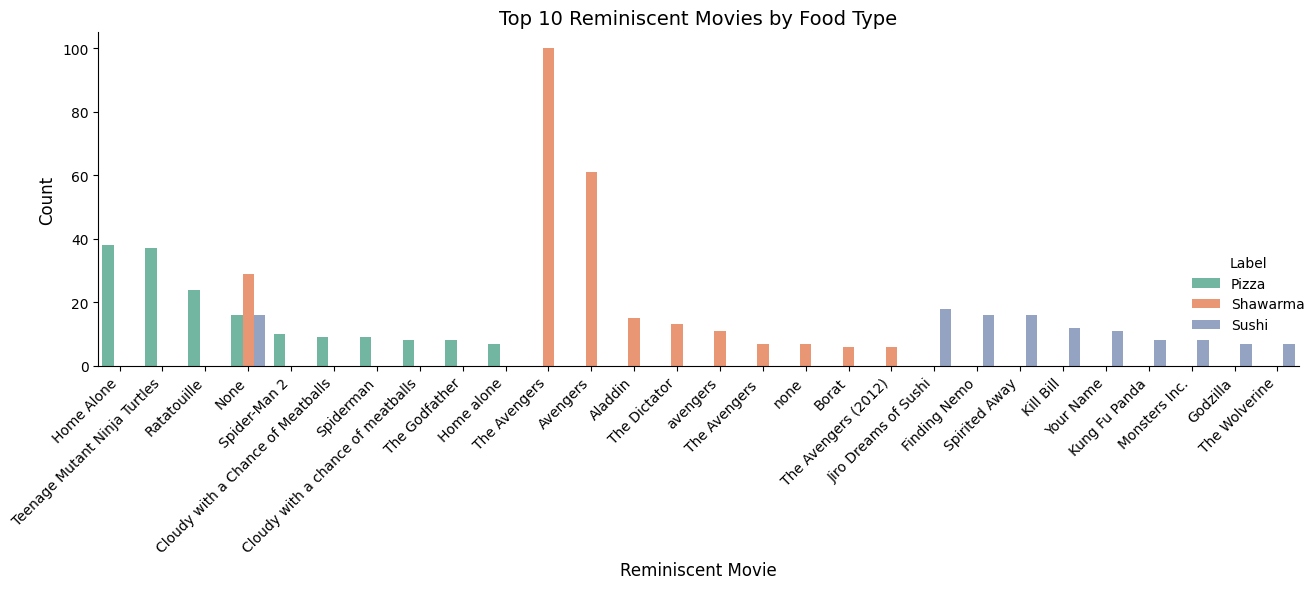

In [7]:
# Get the top 5 most frequent movies per food type
top_n = 10
top_movies_per_label = (
    dataset.groupby("Label")["Q5: What movie do you think of when thinking of this food item?"]
    .value_counts()
    .groupby(level=0)  # Group by Label
    .head(top_n)  # Top N per Label
    .reset_index(name="Count")
)

# Set up the plot
plt.figure(figsize=(12, 6))  # Wider for movie titles
sns.catplot(
    x="Q5: What movie do you think of when thinking of this food item?",
    y="Count",
    hue="Label",
    kind="bar",
    data=top_movies_per_label,
    height=6,
    aspect=2,
    palette="Set2"
)

# Customize the plot
plt.title(f"Top {top_n} Reminiscent Movies by Food Type", fontsize=14)
plt.xlabel("Reminiscent Movie", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha="right")  # Rotate for readability
plt.tight_layout()

# Display the plot
plt.show()

<Figure size 1200x600 with 0 Axes>

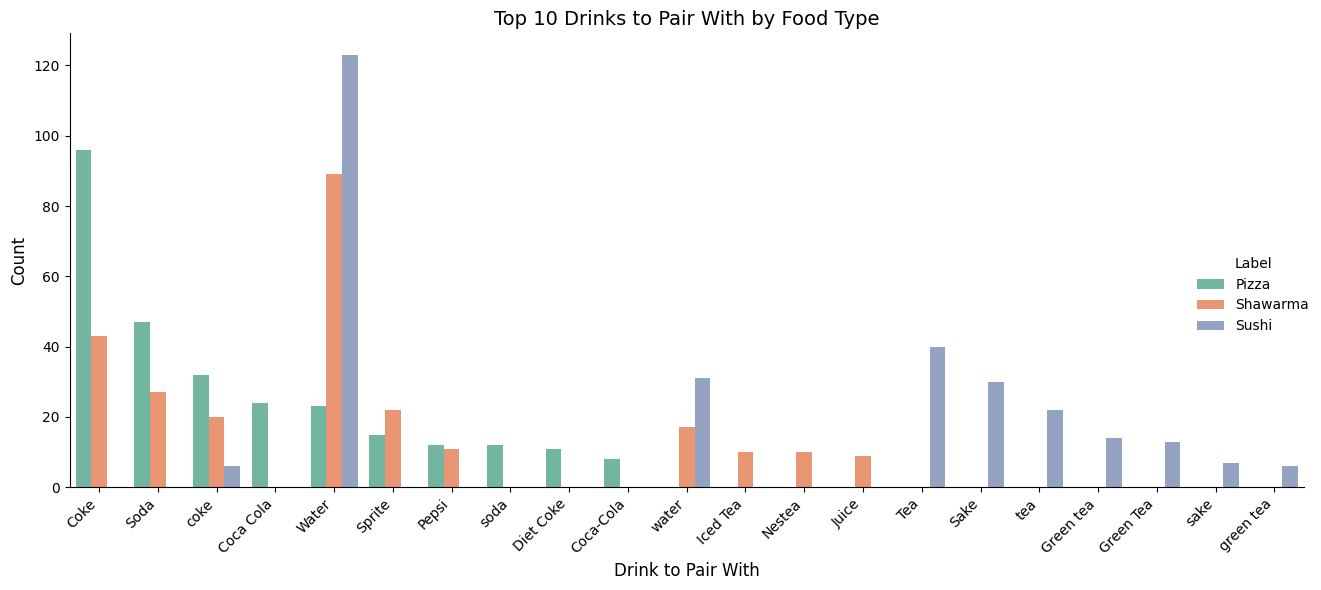

In [8]:
# Get the top 5 most frequent drinks per food type
top_n = 10
top_drinks_per_label = (
    dataset.groupby("Label")["Q6: What drink would you pair with this food item?"]
    .value_counts()
    .groupby(level=0)  # Group by Label
    .head(top_n)  # Top N per Label
    .reset_index(name="Count")
)

# Set up the plot
plt.figure(figsize=(12, 6))  # Wider for drink names
sns.catplot(
    x="Q6: What drink would you pair with this food item?",
    y="Count",
    hue="Label",
    kind="bar",
    data=top_drinks_per_label,
    height=6,
    aspect=2,
    palette="Set2"
)

# Customize the plot
plt.title(f"Top {top_n} Drinks to Pair With by Food Type", fontsize=14)
plt.xlabel("Drink to Pair With", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha="right")  # Rotate for readability
plt.tight_layout()

# Display the plot
plt.show()

<Figure size 1200x600 with 0 Axes>

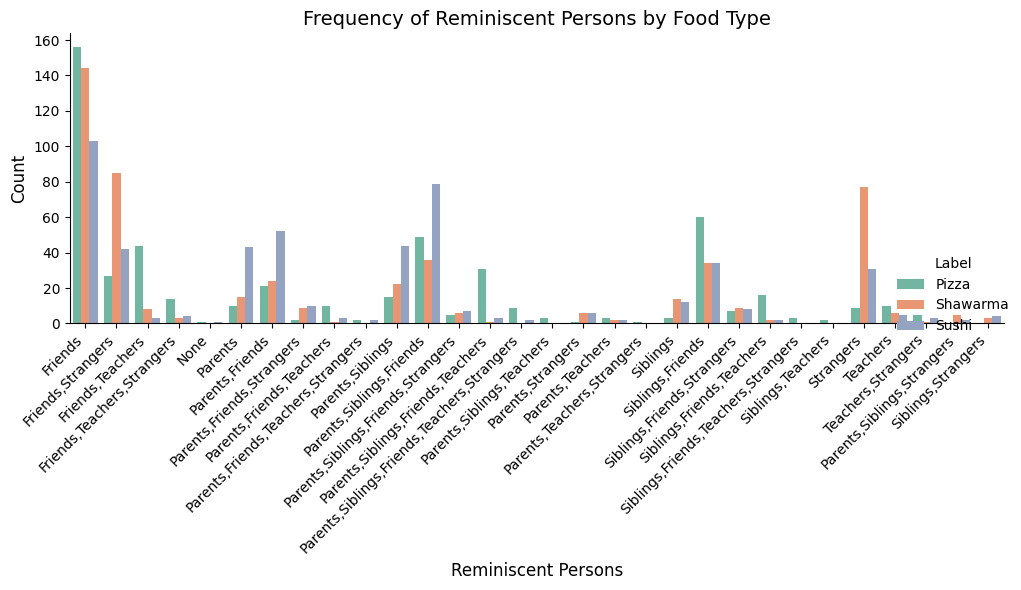

In [9]:
# Explode the multi-label sets into individual rows
exploded_data = dataset.explode("Q7: When you think about this food item, who does it remind you of?")

# Aggregate counts by Label and Reminiscent Persons
count_data = exploded_data.groupby(["Label", "Q7: When you think about this food item, who does it remind you of?"]).size().reset_index(name="Count")

# Set up the plot
#persons = ["Parents", "Siblings", "Friends", "Teachers", "Strangers"]
plt.figure(figsize=(12, 6))  # Adjust size for readability
sns.catplot(
    x="Q7: When you think about this food item, who does it remind you of?",
    y="Count",
    hue="Label",
    kind="bar",
    data=count_data,
    height=6,
    aspect=1.5,
    palette="Set2",
    #order=persons  # Preserve the original category order
)

# Customize the plot
plt.title("Frequency of Reminiscent Persons by Food Type", fontsize=14)
plt.xlabel("Reminiscent Persons", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha="right")  # Rotate for readability
plt.tight_layout()

# Display the plot
plt.show()

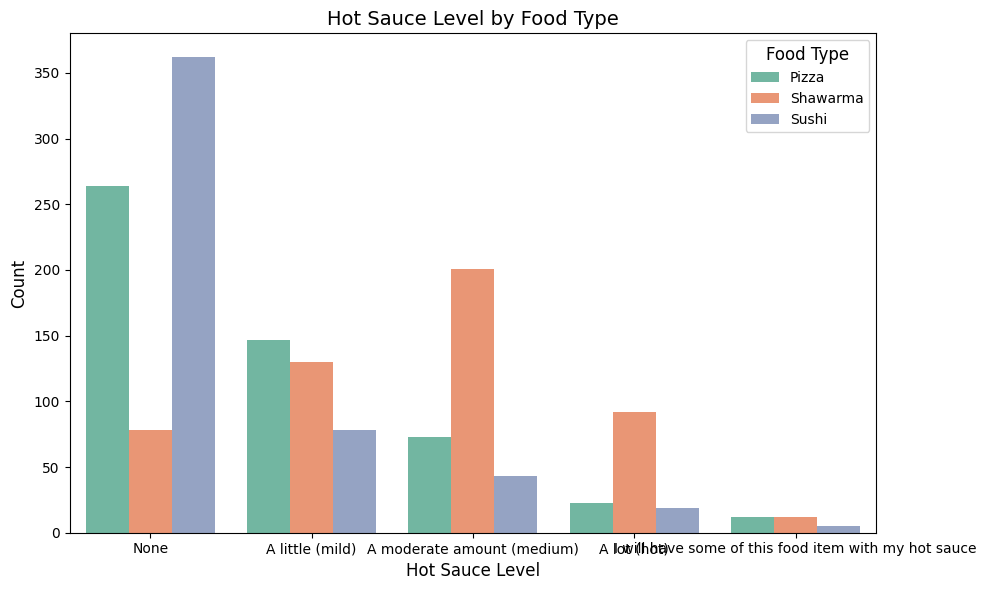

In [10]:
# Set up the plot
hot_sauce_levels = ["None", "A little (mild)", "A moderate amount (medium)", "A lot (hot)", "I will have some of this food item with my hot sauce"]
plt.figure(figsize=(10, 6))  # Adjust size for readability
sns.countplot(
    x="Q8: How much hot sauce would you add to this food item?",
    hue="Label",
    data=dataset,
    palette="Set2",
    order=hot_sauce_levels  # Enforce ordinal order
)

# Customize the plot
plt.title("Hot Sauce Level by Food Type", fontsize=14)
plt.xlabel("Hot Sauce Level", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Food Type", fontsize=10, title_fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()

# Feature Engineering

## 1. Feature $x_1$
The food complexity options from {1, 2, 3, 4, 5} is preserved as is. No changes were made.

## 2. Feature $x_2$
The number of ingredients is represented in **real numbers**. No changes were made.

## 3. Feature $x_4$
The expected price per serving is represented in **real numbers**. No changes were made.

## 4. Features $x_3$ and $x_7$

For **"Q3: In what setting would you expect this food to be served? Please check all that apply"**, the survey respondent chose a combination from **{Weekday Lunch, Weekday Dinner, Weekend Lunch, Weekend Dinner, Party, Latenight Snack}**. The visual analysis suggests that taking into account each possible combination would introduce too much noise. The new $x_3$ feature seeks to mitigate this problem.

The same rationale applies for **Q7: When you think about this food item, who does it remind you of?**, where the survey respondent chose a combination from **{Parents, Siblings, Friends, Teachers, Strangers}**.

To reduce complexity, **features $x_3$ and $x_7$ now represent the number of options chosen within the possible combinations of answers.**

## 5. Features $x_5$ and $x_6$
For both questions **"Q5: What movie do you think of when thinking of this food item?"** and **"Q6: What drink would you pair with this food item?"**, the survey respondent entered any string-value input of their choice.
**I.e., it is NOT feasible to represent every single movie and drink individually present in the dataset.**

Instead, the top 10 common choices for each food item were visually analyzed above. Then, out of those common choices, a numeric encoding was assigned based on which food item is most-likely represented by the choice.

Specifically:

If **choice was popular for Pizza**, then: **$x_5$, $x_6$ = 1**

If **choice was popular for Shawarma**, then: **$x_5$, $x_6$ = 2**

If **choice was popular for Sushi**, then: **$x_5$, $x_6$ = 3**

If **choice did NOT make top 10**, then: **$x_5$, $x_6$ = 0**

## 6. Feature $x_8$
Hot sauce levels are encoded ordinally from 0 to 4.

Specifically:

If **"None"**, then: **$x_8$ = 0**

If **"A little (mild)"**, then: **$x_8$ = 1**

If **"A moderate amount (medium)"**, then: **$x_8$ = 2**

If **"A lot (hot)"**, then: **$x_8$ = 3**

If **"I will have some of this food item with my hot sauce"**, then: **$x_8$ = 4**

# Dataset Features

$x^{(i)} \in$
\[
\begin{aligned}
    x_1 &= \text{Food Complexity} \in \{1, 2, 3, 4, 5\} \\
    x_2 &= \text{Number of Ingredients} \in \mathbb{R} \\
    x_3 &= \text{Expected Occasion} \in \{1, 2, 3, 4, 5, 6\} \\
    x_4 &= \text{Expected Price Per Serving} \in \mathbb{R} \\
    x_5 &= \text{Reminiscent Movie} \in \{0, 1, 2, 3\} \\
    x_6 &= \text{Drink to Pair With} \in \{0, 1, 2, 3\} \\
    x_7 &= \text{Reminiscent Persons } \in \{1, 2, 3, 4, 5\} \\
    x_8 &= \text{Hot Sauce Level} \in \{\text{0, 1, 2, 3, 4}\}
\end{aligned}
\]

# Ground-Truth Labels
$t^{(i)} = \text{One Hot Vector [Pizza, Shawarma, Sushi]}$

In [11]:
def generate_fet1_food_complexity():
    return dataset["Q1: From a scale 1 to 5, how complex is it to make this food? (Where 1 is the most simple, and 5 is the most complex)"]

def generate_fet2_number_of_ingredients():
    return dataset["Q2: How many ingredients would you expect this food item to contain?"]

def generate_fet3_occasion_versatility():
    retlst = []
    for occasions in dataset["Q3: In what setting would you expect this food to be served? Please check all that apply"]:
        retlst.append(len(occasions.split(",")))
    return retlst

def generate_fet4_price_per_serving():
    return dataset["Q4: How much would you expect to pay for one serving of this food item?"]

def generate_fet5_reminiscent_movie():
    retlst= []
    movie_map = {"Home Alone": 1, "Teenage Mutant Ninja Turtles": 1, "spiderman": 1, "Spider-Man 2": 1, "Spiderman": 1,
                 "Cloudy with a Chance of Meatballs": 1, "Cloudy with a chance of meatballs": 1, "The Godfather": 1,
                 "Home alone": 1, "Ratatoullie": 1,
                 "The Avengers": 2, "Avengers": 2, "avengers": 2, "The Avengers (2012)": 2, "none": 2, "Aladdin": 2,
                 "The Dictator": 2, "Borat": 2, "Dangal": 2,
                 "Jiro Dreams of Sushi": 3, "Finding Nemo": 3, "Spirited Away": 3, "Kill Bill": 3, "Your Name": 3,
                 "Kung Fu Panda": 3, "Monsters Inc.": 3, "Godzilla": 3, "The Wolverine": 3, "Big Hero 6": 3
                }
    for movie in dataset["Q5: What movie do you think of when thinking of this food item?"]:
        if movie in movie_map:
            retlst.append(movie_map[movie])
        else:
            retlst.append(0)
    return retlst

def generate_fet6_drink_to_pair_with():
    retlst= []
    drink_map = {"Water": 1, "water": 1, "Iced Tea": 1, "Nestea": 1, "Juice": 1,
                 "Coke": 2, "coke": 2, "Soda": 2, "soda": 2, "Coca Cola": 2, "Coca-Cola": 2,
                 "Sprite": 2, "Diet Coke": 2, "Pepsi": 2,
                 "Tea": 3, "Sake": 3, "tea": 3, "Green tea": 3, "Green Tea": 3, "sake": 3, "green tea": 3
                }
    for drink in dataset["Q6: What drink would you pair with this food item?"]:
        if drink in drink_map:
            retlst.append(drink_map[drink])
        else:
            retlst.append(0)
    return retlst

def generate_fet7_reminiscent_persons_versatility():
    retlst = []
    for persons in dataset["Q7: When you think about this food item, who does it remind you of?"]:
        retlst.append(len(persons.split(",")))
    return retlst

def generate_fet8_hot_sauce_level():
    retlst = []
    hot_sauce_level_map = {"None": 0,
                           "A little (mild)": 1,
                           "A moderate amount (medium)": 2,
                           "A lot (hot)": 3,
                           "I will have some of this food item with my hot sauce": 4
                          }
    for hot_sauce_level in dataset["Q8: How much hot sauce would you add to this food item?"]:
        retlst.append(hot_sauce_level_map[hot_sauce_level])
    return retlst


In [12]:
def generate_feature_matrix():
    feature_matrix = np.stack([
        generate_fet1_food_complexity(),
        generate_fet2_number_of_ingredients(),
        generate_fet3_occasion_versatility(),
        generate_fet4_price_per_serving(),
        generate_fet5_reminiscent_movie(),
        generate_fet6_drink_to_pair_with(),
        generate_fet7_reminiscent_persons_versatility(),
        generate_fet8_hot_sauce_level()
        ], axis=1)
    return feature_matrix

def generate_one_hot_labels():
    one_hot_matrix = np.zeros((1539, 3))
    food_labels = np.array(dataset["Label"])
    for label in range(len(food_labels)):
        if food_labels[label] == "Pizza":
            one_hot_matrix[label][0] = 1
        elif food_labels[label] == "Shawarma":
            one_hot_matrix[label][1] = 1
        elif food_labels[label] == "Sushi":
            one_hot_matrix[label][2] = 1
    return one_hot_matrix

data_fets   = generate_feature_matrix()  # USE THIS!
data_truths = generate_one_hot_labels()  # USE THIS!

print(data_fets.shape)   # Should be (1530, 8)
print(data_truths.shape) # Should be (1530, 3)

(1539, 8)
(1539, 3)


In [13]:
# Testing `data_fets`
print(data_fets[0])
print(data_fets[1])
print(data_fets[2])
print(data_fets[3])
print(data_fets[4])
print()
print(data_fets[1534])
print(data_fets[1535])
print(data_fets[1536])
print(data_fets[1537])
print(data_fets[1538])
print()
print()

# Testing `data_truths`
print(data_truths[234])   # Pizza    = [1. 0. 0.]
print(data_truths[235])   # Shawarma = [0. 1. 0.]
print()
print(data_truths[463])   # Shawarma = [0. 1. 0.]
print(data_truths[464])   # Sushi    = [0. 0. 1.]
print()
print(data_truths[689])   # Sushi    = [0. 0. 1.]
print(data_truths[690])   # Pizza    = [1. 0. 0.]
print()
print(data_truths[973])   # Pizza    = [1. 0. 0.]
print(data_truths[974])   # Shawarma = [0. 1. 0.]
print()
print(data_truths[1257])  # Shawarma = [0. 1. 0.]
print(data_truths[1258])  # Sushi    = [0. 0. 1.]

[3. 6. 3. 5. 1. 0. 1. 1.]
[4. 2. 3. 5. 0. 2. 3. 0.]
[ 3.  5.  4. 10.  0.  0.  1.  2.]
[4. 7. 6. 3. 0. 2. 3. 4.]
[2. 3. 5. 5. 1. 2. 2. 1.]

[ 4.  4.  6. 11.  0.  0.  3.  0.]
[ 3.   4.5  2.  13.5  0.   1.   1.   1. ]
[ 2.  5.  3. 10.  0.  0.  1.  0.]
[1. 3. 3. 1. 0. 0. 3. 1.]
[4.   4.   5.   0.96 0.   0.   4.   0.  ]


[1. 0. 0.]
[0. 1. 0.]

[0. 1. 0.]
[0. 0. 1.]

[0. 0. 1.]
[1. 0. 0.]

[1. 0. 0.]
[0. 1. 0.]

[0. 1. 0.]
[0. 0. 1.]
